# Lead Scoring Case Study

## Problem Statement
X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

# Business Goal
Basically the company wants you to:
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

# Step 1: Reading and Understanding the Data

Let us first import important libraries and read the Bike Sharing dataset

In [1]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing important libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
leadScore = pd.read_csv('Leads.csv')

# checking the head of the data set

leadScore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leadScore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
leadScore.shape

(9240, 37)

In [6]:
leadScore.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
leadScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 2: Data Cleaning

In [8]:
# Checking for any duplicate values

leadScore_Copy = leadScore.copy()

leadScore_Copy.shape

(9240, 37)

In [9]:
leadScore_Copy.drop_duplicates(inplace=True)

leadScore_Copy.shape

(9240, 37)

As there is no change in shape of the data set after `drop_duplicates`, it means that there are no duplicate values in the original data set

In [10]:
# Checking for percentage of the null values if there are any

leadMissing = round(100*(leadScore.isnull().sum()/len(leadScore.index)),2)

leadMissing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

As we have noticed in the data set, these following columns have an input named `Selected`:
- `Specialization`
- `How did you hear about X Education`
- `Lead Profile`
- `City`

The `Selected` input is counted as a value meanwhile it should be counted as a missing value and it may hindering the analysis so we are going to replace it with `NaN`

In [11]:
leadScore['Specialization'] = leadScore['Specialization'].replace('Select', np.nan)
leadScore['How did you hear about X Education'] = leadScore['How did you hear about X Education'].replace('Select', np.nan)
leadScore['Lead Profile'] = leadScore['Lead Profile'].replace('Select', np.nan)
leadScore['City'] = leadScore['City'].replace('Select', np.nan)

In [12]:
# Again checking for the null values

leadMissing = round(100*(leadScore.isnull().sum()/len(leadScore.index)),2)

leadMissing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We can notice that there are high percentages of null values in many columns, so we are going to drop all the columns that have 30% or more null values 

In [13]:
leadScore = leadScore.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [14]:
# Again checking the missing values 
leadMissing = round(100*(leadScore.isnull().sum()/len(leadScore.index)),2)

leadMissing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

As we can observe that we still have some columns with missing values 

- We need to check these columns to see what values do they have
- Then we can go ahead with imputing values or just drop the whole column

In [15]:
leadScore.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

Now let's check the median of values for `TotalVisits` columns

In [16]:
leadScore.TotalVisits.median()

3.0

So as we know, we need to swap the missing values with the median value `3`

In [19]:
leadScore['TotalVisits'] = leadScore['TotalVisits'].replace(np.nan, leadScore['TotalVisits'].median())

In [21]:
leadScore['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We can notice that `Google` has appeared twice with different phrase `google`, so we need to change to only one form

Also, the majority of values are `Google` so we are going to impute the other missing values as `Google`

In [22]:
leadScore['Lead Source'] = leadScore['Lead Source'].replace('google', 'Google')
leadScore['Lead Source'] = leadScore['Lead Source'].replace(np.nan, 'Google')

In [24]:
leadScore['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

Let's check for the median value of `Page Views Per Visit`

In [25]:
leadScore['Page Views Per Visit'].median()

2.0

We are going to swap the missing values with median value `2.0`

In [26]:
leadScore['Page Views Per Visit'] = leadScore['Page Views Per Visit'].replace(np.nan, leadScore['Page Views Per Visit'].median())

In [28]:
leadScore['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

We cannot really figure out any information on the missing values from the above representation, so we can add some new category for the missing values, let's call it `unavailable`

In [29]:
leadScore['Last Activity'] = leadScore['Last Activity'].replace(np.nan, 'unavailable')

In [31]:
leadScore['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

We can observe that `India` appears majority of the times, and the `Country` columns has almost 27% missing values so we can drop this column rather than imputing any values.

In [32]:
leadScore = leadScore.drop(['Country'], axis=1)

In [33]:
leadScore['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Since we cannot draw a clear inference around the current occupation, thus we can set a new category for the missing values, let's call it `unavailable`

In [34]:
leadScore['What is your current occupation'] = leadScore['What is your current occupation'].replace(np.nan, 'unavailable')

In [35]:
leadScore['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We can clearly see that `Better Career Prospect` appears most of the time, and there are `29.32%` missing values. Thus it won't be feasible to carry this columns forward by imputing values and hence we can drop this column.

In [36]:
leadScore = leadScore.drop(['What matters most to you in choosing a course'], axis=1)

Again, checking for missing values in all the remaining columns

In [37]:
leadMissing = round(100*(leadScore.isnull().sum()/len(leadScore.index)),2)

leadMissing

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

So, all the missing values have been imputed or the columns with majority of value concentration in one variable have been removed. We have also observed that there are columns which did not have any missing values but the majority of concentration of values was only in one variable, so we need to remove those columns as well.

In [38]:
leadScore = leadScore.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [39]:
leadScore.shape

(9240, 20)

# Step 3: Data Visualization

Let's check for `Converted` target variable which indicated whether a lead has been converted (1) or not (2)

In [41]:
leadConverted = round((sum(leadScore['Converted'])/len(leadScore['Converted'].index))*100, 2)
leadConverted

38.54

So, we can observe that we have got a conversion rate of `38.54%`

We have already cleaned the data, but now let's check for any outliers in the data set which may hinder the distribution of data during visualization

In [42]:
leadScore.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


We can clearly notice that there are outliers in the columns `TotalVisits` and `Page Views Per Visit`

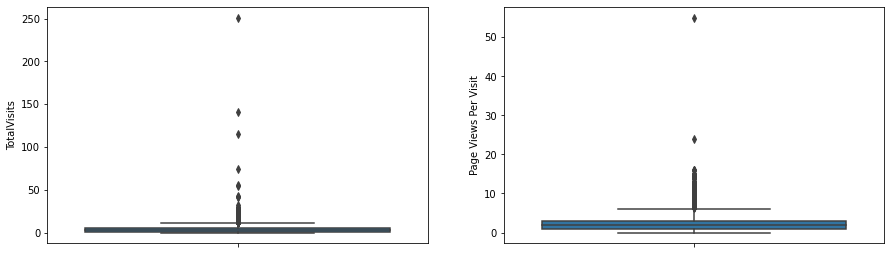

In [46]:
plt.figure(figsize=(15, 20))
plt.subplot(4,2,1)
sns.boxplot(y = 'TotalVisits', data = leadScore)
plt.subplot(4,2,2)
sns.boxplot(y = 'Page Views Per Visit', data = leadScore)
plt.show()

So, we can cap the values beyond 99% for both `TotalVisits` & `Page Views Per Visit`, thereby omitting the outliers and hence making the distribution more linear

In [47]:
cap_totalVisits = leadScore['TotalVisits'].quantile(0.99)
leadScore = leadScore[leadScore["TotalVisits"] < cap_totalVisits]

cap_pageViews = leadScore['Page Views Per Visit'].quantile(0.99)
leadScore = leadScore[leadScore['Page Views Per Visit'] < cap_pageViews]

leadScore.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


Let's check the retention of data

In [49]:
retainedLead = round((len(leadScore)/9240)*100, 2)
retainedLead

97.72

So `97.72%` data is still retained

#### Now let's try to understand the data of each column and their effect on the conversion rate

#### `Converted`

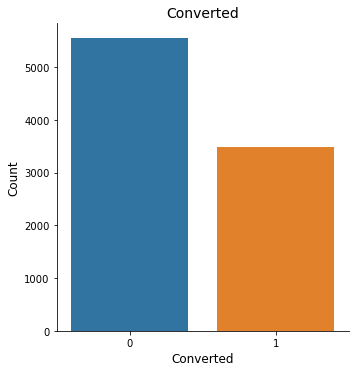

In [54]:
sns.catplot(data=leadScore, x='Converted', kind='count')
plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

We can infere from the above plot that conversion rate is nearly `39%`

#### `